In [1]:
import numpy as np
import pandas as pd
import pingouin as pg

# Create fake dataframe (optional)
# np.random.seed(42)
# df = pg.read_dataset('pairwise_corr').iloc[:200, 1:].round(2)
# df['Age'] = np.random.randint(low=18, high=65, size=df.shape[0])
# df['IQ'] = np.round(np.random.normal(110, 15, size=df.shape[0])).astype(int)
# height, weight = np.round(np.random.multivariate_normal([167, 70], [[70, 30], [30, 70]], df.shape[0]).T, 1)
# df['Height'] = height
# df['Weight'] = weight
# df.rename(columns={'Neuroticism': 'N', 'Extraversion': 'E', 'Openness': 'O', 
#                    'Agreeableness': "A", "Conscientiousness": "C"}, inplace=True)

# df = df[['Age', 'IQ', 'Height', 'Weight', 'O', 'C', 'E', 'A', 'N']]
# df.to_csv('data_corr.csv', index=False)

# Or simply load the final CSV file
df = pd.read_csv('data_corr.csv')
print('%i subjects and %i columns' % df.shape)
df.head()

200 subjects and 9 columns


,Age,IQ,Height,Weight,O,C,E,A,N
0,56,110,158.0,57.1,3.94,3.46,4.21,3.96,2.48
1,46,85,168.7,74.1,3.96,3.23,3.19,3.40,2.60
2,32,94,162.8,74.1,3.42,3.50,2.90,2.75,2.81
3,60,95,166.5,77.9,3.52,2.79,3.56,3.17,2.90
4,25,112,164.9,75.5,4.02,2.85,3.33,3.21,3.02


## Simple correlation between two columns

**Is height significantly correlated to weight?**

In [2]:
pg.corr(x=df['Height'], y=df['Weight'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,200,0.447,"[0.33, 0.55]",0.2,0.192,3.253278e-11,2.718e+08,1.0


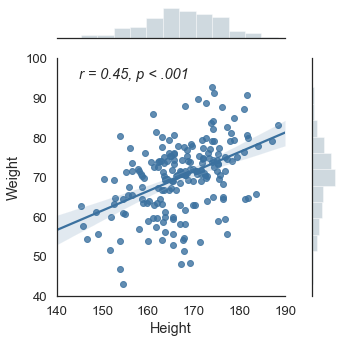

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='Height', y='Weight', xlim=(140, 190), ylim=(40, 100), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

## Pairwise correlations between all columns

In [4]:
pg.pairwise_corr(df).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
15,Height,Weight,200,0.447,3.253278e-11
32,C,N,200,-0.368,8.039531e-08
34,E,N,200,-0.344,6.250856e-07
27,O,E,200,0.273,9.202577e-05
35,A,N,200,-0.174,1.377071e-02


In [5]:
# Using the non-parametric Spearman correlation
corrs = pg.pairwise_corr(df, columns=['O', 'C', 'E', 'A', 'N'], method='spearman')
corrs.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
6,C,N,200,-0.344,5.949367e-07
8,E,N,200,-0.316,5.012590e-06
1,O,E,200,0.240,6.052724e-04
9,A,N,200,-0.184,9.222107e-03
2,O,A,200,0.066,3.530784e-01


In [6]:
# One-versus-all
corrs = pg.pairwise_corr(df, columns=[['IQ'], ['O', 'C', 'E', 'A', 'N']])
corrs.sort_values(by=['p-unc'])[['X', 'Y', 'r', 'p-unc']].head()

,X,Y,r,p-unc
4,IQ,N,0.126,0.075263
3,IQ,A,-0.083,0.240637
2,IQ,E,-0.056,0.430250
1,IQ,C,0.013,0.854993
0,IQ,O,-0.006,0.934357


## Correlation matrix

In [7]:
df.corr().round(2)

,Age,IQ,Height,Weight,O,C,E,A,N
Age,1.00,-0.01,-0.05,-0.05,-0.03,-0.13,-0.11,-0.07,0.08
IQ,-0.01,1.00,0.07,0.11,-0.01,0.01,-0.06,-0.08,0.13
Height,-0.05,0.07,1.00,0.45,-0.12,0.03,-0.07,-0.03,0.07
Weight,-0.05,0.11,0.45,1.00,-0.11,0.10,0.00,-0.00,-0.15
O,-0.03,-0.01,-0.12,-0.11,1.00,-0.02,0.27,0.07,-0.04
C,-0.13,0.01,0.03,0.10,-0.02,1.00,0.01,0.07,-0.37
E,-0.11,-0.06,-0.07,0.00,0.27,0.01,1.00,0.02,-0.34
A,-0.07,-0.08,-0.03,-0.00,0.07,0.07,0.02,1.00,-0.17
N,0.08,0.13,0.07,-0.15,-0.04,-0.37,-0.34,-0.17,1.00


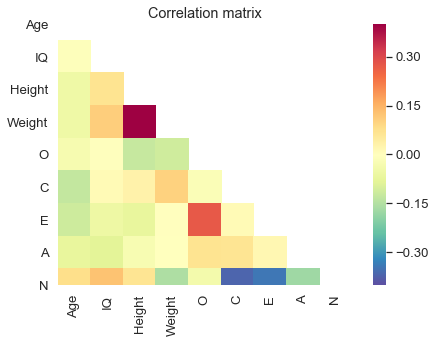

In [8]:
plt.figure(figsize=(7, 5))
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')
plt.tight_layout()

**With the p-values on the upper triangle**

In [9]:
# This function was added in Pingouin 0.2.8
df.rcorr()

,Age,IQ,Height,Weight,O,C,E,A,N
Age,-,,,,,,,,
IQ,-0.006,-,,,,,,,
Height,-0.052,0.071,-,***,,,,,
Weight,-0.053,0.106,0.447,-,,,,,*
O,-0.031,-0.006,-0.123,-0.111,-,,***,,
C,-0.128,0.013,0.033,0.102,-0.019,-,,,***
E,-0.114,-0.056,-0.071,0.001,0.273,0.014,-,,***
A,-0.069,-0.083,-0.028,-0.002,0.071,0.066,0.02,-,*
N,0.079,0.126,0.066,-0.154,-0.04,-0.368,-0.344,-0.174,-


In [10]:
# On a subset of columns
df[['O', 'C', 'E', 'A', 'N']].rcorr()

,O,C,E,A,N
O,-,,***,,
C,-0.019,-,,,***
E,0.273,0.014,-,,***
A,0.071,0.066,0.02,-,*
N,-0.04,-0.368,-0.344,-0.174,-
